# Лаболаторна № 3: Методи статистичного опрацювання експериментальних даних.

***Тема***: Методи статистичного опрацювання експериментальних даних.
Підготовка, візуалізація, статистичне опрацювання та кореляційний аналіз да-
них моніторингу реальних процесів. Комплексний калькулятор моніторингу процесів.

***Мета***: Навчити студентів отримувати, структурувати, візуалізувати, статис-
тично опрацьовувати дані моніторингу реальних (природних) процесів та вста-
новлювати причинно-наслідковий зв’язок між реальними явищами, наприклад,природними.

## Початок роботи. Встановлення необіхдніх засобів.

### Інсталяція pandas

Цей етап необхідний для того щоб встановити [**pandas**](https://pandas.pydata.org/) у систему. Що таке pandas? Бібліотека Pandas - це потужний інструмент для обробки та аналізу даних у мові програмування Python. Основні його компоненти - це DataFrame і Series. DataFrame - це двовимірна таблична структура даних, а Series - одномірний масив з індексом. Pandas надає широкі можливості для завантаження, фільтрації, сортування, об'єднання та агрегації даних. Вона дозволяє ефективно працювати з різними типами даних і виконувати операції з ними, такі як групування, злиття, зміна розмірності, обчислення статистики тощо. Pandas є основним інструментом для аналізу даних у величезній кількості сфер, включаючи науку про дані, фінанси, біологію, соціологію та інші галузі.

In [1]:
!pip install pandas # це встановить бібліотеку у нашу систему.
!pip install toolz # бібліотека для функціонального програмування у середі python


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


### Ініціація моделі даних

На цьому етапі ми ініціюємо заздалегіть підготовлену модель даних котра містить поведінку та данні про міста й погоду у цих містах у період 10 днів.

[Переглянути код](./model.py)

In [2]:
from model import load_model # Імпорт функції контра ініціює нашу модель даних.
from toolz.functoolz import pipe # Дозволяє створювати композиції послідовності дій над даними
model = load_model() # Наша модель

## Работа з даними

### Таблиця міст

Ця таблиця містить шукомі міста, їх географічні данні.

In [3]:
model.get_cities_df(),

(                         Місто   Широта  Довгота
 Ідентифікатор міста                             
 Kyiv                      Київ  50.4501  30.5234
 Lviv                     Львів  49.8397  24.0297
 Odesa                    Одеса  46.4825  30.7233
 Kharkiv                 Харків  49.9935  36.2304
 Dnipro                  Дніпро  48.4647  35.0462
 Donetsk                Донецьк  48.0159  37.8028
 Zaporizhzhia         Запоріжжя  47.8388  35.1396,)

### Таблиця погодних даних

Ця таблиця містить данні отримані з ресурсу [open-meteo.com](https://open-meteo.com). 

**Open-Meteo** - це відкритий погодний API для безкоштовного використання без необхідності ключа API. Починайте використовувати його прямо зараз!

In [4]:
model.get_weather_df()

Ідентифікатор міста  Температура  Вологість        Дата  \
Ідентифікатор погоди                                                           
0                                   Kyiv         17.2         81  2023-04-22   
1                                   Kyiv         18.5         62  2023-04-23   
2                                   Kyiv         18.7         69  2023-04-24   
3                                   Kyiv         19.4         78  2023-04-25   
4                                   Kyiv         14.4         94  2023-04-26   
...                                  ...          ...        ...         ...   
1500                        Zaporizhzhia          6.0         94  2023-11-18   
1501                        Zaporizhzhia          3.6        100  2023-11-19   
1502                        Zaporizhzhia          1.1         92  2023-11-20   
1503                        Zaporizhzhia          0.6         83  2023-11-21   
1504                        Zaporizhzhia         -0.7         87  2023-11-22   

                        Тиск  
Ідентифікатор погоди          
0                      996.9  
1                      999.1  
2                      997.2  
3                      993.1  
4                      989.5  
...                      ...  
1500                  1005.6  
1501                  1002.6  
1502                   999.7  
1503                  1008.8  
1504                  1009.9  

[1505 rows x 5 columns]

### Поєднання таблиць погодних даних з містами

In [5]:
model.get_forecast_df()

Ідентифікатор міста      Місто   Широта  Довгота  Температура  Вологість  \
0                   Kyiv       Київ  50.4501  30.5234         17.2         81   
1                   Kyiv       Київ  50.4501  30.5234         18.5         62   
2                   Kyiv       Київ  50.4501  30.5234         18.7         69   
3                   Kyiv       Київ  50.4501  30.5234         19.4         78   
4                   Kyiv       Київ  50.4501  30.5234         14.4         94   
...                  ...        ...      ...      ...          ...        ...   
1500        Zaporizhzhia  Запоріжжя  47.8388  35.1396          6.0         94   
1501        Zaporizhzhia  Запоріжжя  47.8388  35.1396          3.6        100   
1502        Zaporizhzhia  Запоріжжя  47.8388  35.1396          1.1         92   
1503        Zaporizhzhia  Запоріжжя  47.8388  35.1396          0.6         83   
1504        Zaporizhzhia  Запоріжжя  47.8388  35.1396         -0.7         87   

            Дата    Тиск  
0     2023-04-22   996.9  
1     2023-04-23   999.1  
2     2023-04-24   997.2  
3     2023-04-25   993.1  
4     2023-04-26   989.5  
...          ...     ...  
1500  2023-11-18  1005.6  
1501  2023-11-19  1002.6  
1502  2023-11-20   999.7  
1503  2023-11-21  1008.8  
1504  2023-11-22  1009.9  

[1505 rows x 8 columns]

### Температурні показники

#### Таблиця погодних даних по містам.

In [6]:
model.get_temperature_df()

Дата Ідентифікатор міста      Місто  2023-04-22  2023-04-23  2023-04-24  \
0                 Dnipro     Дніпро        12.6        17.0        17.9   
1                Donetsk    Донецьк        10.4        13.1        17.1   
2                Kharkiv     Харків        11.8        17.3        18.0   
3                   Kyiv       Київ        17.2        18.5        18.7   
4                   Lviv      Львів        17.0        19.5        20.3   
5                  Odesa      Одеса        14.7        15.5        15.1   
6           Zaporizhzhia  Запоріжжя        12.4        16.7        17.6   

Дата  2023-04-25  2023-04-26  2023-04-27  2023-04-28  2023-04-29  ...  \
0           16.4        20.6        20.3        13.0        11.6  ...   
1           12.0        18.8        21.3        17.2        16.9  ...   
2           14.3        20.4        21.3        16.4        11.3  ...   
3           19.4        14.4         8.1        12.9        14.8  ...   
4           13.6         8.2         9.7        12.2        15.3  ...   
5           13.9        13.2         9.9        14.4        14.1  ...   
6           17.1        19.6        20.1        13.5        12.9  ...   

Дата  2023-11-13  2023-11-14  2023-11-15  2023-11-16  2023-11-17  2023-11-18  \
0            9.9        10.1         9.8         9.1         6.2         5.1   
1            9.9         9.1         9.4        10.2         6.2         4.4   
2            8.3         8.8         9.3         8.1         5.6         2.3   
3            8.5         7.7        10.8         7.6         3.1         2.4   
4            8.0        10.9         9.1         4.7         3.5         2.0   
5           11.9        12.3        11.2        10.6         8.2         6.4   
6            9.7        10.3        10.3         9.9         5.8         6.0   

Дата  2023-11-19  2023-11-20  2023-11-21  2023-11-22  
0            2.9         0.9         0.2        -0.9  
1            4.2         2.2        -2.3        -2.6  
2            0.1        -0.6        -2.6        -3.7  
3           -1.2        -0.3         0.1        -1.4  
4            2.7         5.6         5.7         0.9  
5            3.8         4.0         9.5         8.7  
6            3.6         1.1         0.6        -0.7  

[7 rows x 217 columns]

#### Графічне зображення наведених температурних данних

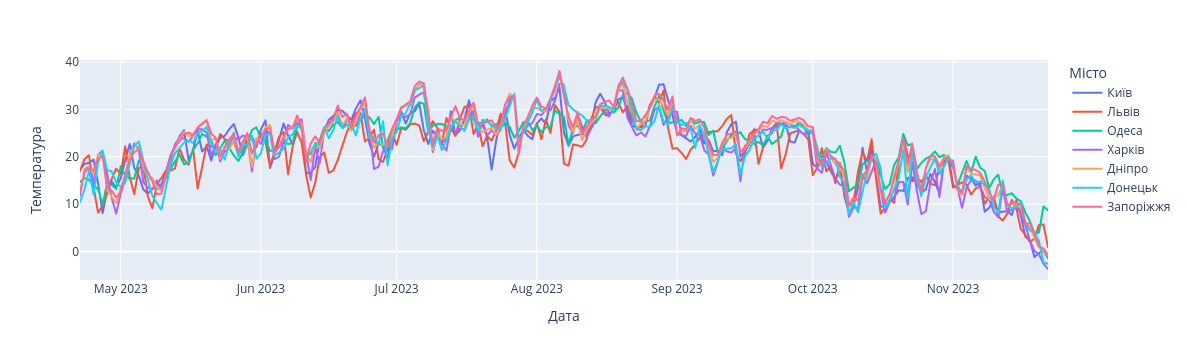

In [7]:
model.print_temperatures_plot()

#### Агрегації температурних даних 

##### По датах

In [8]:
model.get_temperature_agg_df("index")

Мін.  Макс.  Розмах  Середнє  Дисперсія  Коеф. варіації
Дата                                                               
2023-04-22  10.0   17.0    13.0     14.0        7.0         -1110.0
2023-04-23  13.0   20.0    17.0     17.0        4.0         -1472.0
2023-04-24  15.0   20.0    18.0     18.0        2.0         -1624.0
2023-04-25  12.0   19.0    14.0     15.0        6.0         -1273.0
2023-04-26   8.0   21.0    19.0     16.0       22.0         -1178.0
...          ...    ...     ...      ...        ...             ...
2023-11-18   2.0    6.0     4.0      4.0        3.0          -224.0
2023-11-19  -1.0    4.0     3.0      2.0        4.0           -25.0
2023-11-20  -1.0    6.0     1.0      2.0        5.0            43.0
2023-11-21  -3.0   10.0     0.0      2.0       20.0           282.0
2023-11-22  -4.0    9.0    -1.0      0.0       17.0           404.0

[215 rows x 6 columns]

##### По містах

In [9]:
model.get_temperature_agg_df("columns")

Мін.  Макс.  Розмах  Середнє  Дисперсія  Коеф. варіації
Місто                                                             
Дніпро     -1.0   37.0    24.0     23.0       50.0         -1546.0
Донецьк    -3.0   37.0    23.0     22.0       52.0         -1467.0
Запоріжжя  -1.0   38.0    25.0     23.0       53.0         -1590.0
Київ       -1.0   35.0    23.0     21.0       54.0         -1402.0
Львів       1.0   34.0    22.0     20.0       44.0         -1378.0
Одеса       4.0   33.0    24.0     22.0       33.0         -1666.0
Харків     -4.0   35.0    23.0     21.0       56.0         -1373.0

### Вологість

#### Таблиця даних вологості у містах

In [10]:
model.get_humidity_df()

Дата Ідентифікатор міста      Місто  2023-04-22  2023-04-23  2023-04-24  \
0                 Dnipro     Дніпро        94.0       100.0       100.0   
1                Donetsk    Донецьк        92.0        99.0       100.0   
2                Kharkiv     Харків        90.0        87.0        95.0   
3                   Kyiv       Київ        81.0        62.0        69.0   
4                   Lviv      Львів        71.0        71.0        73.0   
5                  Odesa      Одеса        90.0        93.0        85.0   
6           Zaporizhzhia  Запоріжжя        92.0        97.0       100.0   

Дата  2023-04-25  2023-04-26  2023-04-27  2023-04-28  2023-04-29  ...  \
0           87.0        84.0        95.0        96.0        89.0  ...   
1           95.0        92.0        85.0        95.0        94.0  ...   
2           89.0        88.0        90.0       100.0        89.0  ...   
3           78.0        94.0        88.0        74.0        74.0  ...   
4           91.0        90.0        75.0        84.0        73.0  ...   
5           91.0        94.0        88.0        73.0        76.0  ...   
6           89.0        92.0        94.0        95.0        90.0  ...   

Дата  2023-11-13  2023-11-14  2023-11-15  2023-11-16  2023-11-17  2023-11-18  \
0           91.0        93.0        92.0        96.0        95.0        92.0   
1           88.0        95.0        96.0        97.0        96.0        95.0   
2           85.0        93.0        94.0        96.0        94.0        88.0   
3           82.0        92.0        94.0        96.0        94.0        93.0   
4           88.0        93.0        93.0        88.0        99.0        99.0   
5           86.0        87.0        96.0        96.0        87.0        87.0   
6           94.0       100.0        93.0        94.0        94.0        94.0   

Дата  2023-11-19  2023-11-20  2023-11-21  2023-11-22  
0           98.0        96.0        87.0        90.0  
1           94.0        97.0        82.0        79.0  
2           94.0        91.0        80.0        84.0  
3           79.0        86.0        92.0        92.0  
4           98.0        98.0        98.0        95.0  
5           90.0        85.0        91.0        94.0  
6          100.0        92.0        83.0        87.0  

[7 rows x 217 columns]

#### Графічне зображення наведених показників вологості

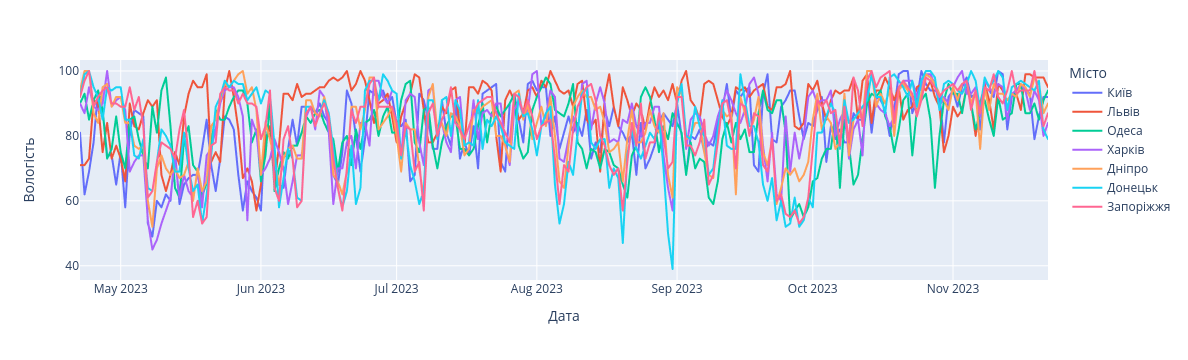

In [11]:
model.print_humidity_plot()

#### Агрегації даних вологості

##### По даті

In [12]:
model.get_humidity_agg_df("index")

Мін.  Макс.  Розмах  Середнє  Дисперсія  Коеф. варіації
Дата                                                               
2023-04-22    71     94      23    87.14      68.14            9.47
2023-04-23    62    100      38    87.00     221.67           17.11
2023-04-24    69    100      31    88.86     178.48           15.03
2023-04-25    78     95      17    88.57      27.95            5.97
2023-04-26    84     94      10    90.57      12.95            3.97
...          ...    ...     ...      ...        ...             ...
2023-11-18    87     99      12    92.57      16.95            4.45
2023-11-19    79    100      21    93.29      50.90            7.65
2023-11-20    85     98      13    92.14      27.14            5.65
2023-11-21    80     98      18    87.57      41.62            7.37
2023-11-22    79     95      16    88.71      33.24            6.50

[215 rows x 6 columns]

##### По містам

In [13]:
model.get_humidity_agg_df("columns")

Мін.  Макс.  Розмах  Середнє  Дисперсія  Коеф. варіації
Місто                                                             
Дніпро       52    100      48    83.37     110.02           12.58
Донецьк      39    100      61    81.86     180.23           16.40
Запоріжжя    53    100      47    83.29     138.65           14.14
Київ         49    100      51    82.41     117.66           13.16
Львів        57    100      43    88.94      77.42            9.89
Одеса        54     98      44    81.34      94.80           11.97
Харків       45    100      55    83.73     129.28           13.58

### Показники тиску

#### Таблиця тиску

In [14]:
model.get_pressure_df()

Дата Ідентифікатор міста      Місто  2023-04-22  2023-04-23  2023-04-24  \
0                 Dnipro     Дніпро      1007.3      1010.5      1009.4   
1                Donetsk    Донецьк       988.1       992.1       991.7   
2                Kharkiv     Харків       998.7      1002.8      1002.6   
3                   Kyiv       Київ       996.9       999.1       997.2   
4                   Lviv      Львів       983.0       982.3       978.0   
5                  Odesa      Одеса      1008.5      1011.3      1008.9   
6           Zaporizhzhia  Запоріжжя      1004.4      1008.0      1006.5   

Дата  2023-04-25  2023-04-26  2023-04-27  2023-04-28  2023-04-29  ...  \
0         1005.0      1003.3      1002.6      1003.5      1006.1  ...   
1          986.6       987.4       985.3       984.8       986.1  ...   
2          998.2       996.1       996.3       996.4      1000.4  ...   
3          993.1       989.5       996.4       999.6      1000.8  ...   
4          973.2       982.0       987.4       989.0       985.6  ...   
5         1005.4      1000.8      1006.4      1007.4      1007.1  ...   
6         1001.8      1000.7       999.6       999.8      1001.8  ...   

Дата  2023-11-13  2023-11-14  2023-11-15  2023-11-16  2023-11-17  2023-11-18  \
0         1008.1      1006.9       999.5      1004.9      1009.4      1010.2   
1          990.6       988.8       981.4       984.7       990.8       991.4   
2          998.1       997.7       989.8       994.2      1002.9      1006.7   
3          993.4       992.1       986.0       996.0       999.0      1003.6   
4          980.8       974.1       977.0       983.7       980.3       988.4   
5         1010.4      1006.9      1000.9      1010.4      1011.2      1004.4   
6         1006.2      1004.8       997.1      1002.8      1006.9      1005.6   

Дата  2023-11-19  2023-11-20  2023-11-21  2023-11-22  
0         1008.2      1002.8      1011.9      1013.7  
1          988.9       981.4       992.3       993.6  
2         1005.3       993.9      1003.4      1004.8  
3         1003.2       994.1       998.6      1005.0  
4          987.9       976.6       981.7       992.9  
5         1003.4      1005.1      1007.5      1015.6  
6         1002.6       999.7      1008.8      1009.9  

[7 rows x 217 columns]

#### Графічне зображення наведених показників тиску

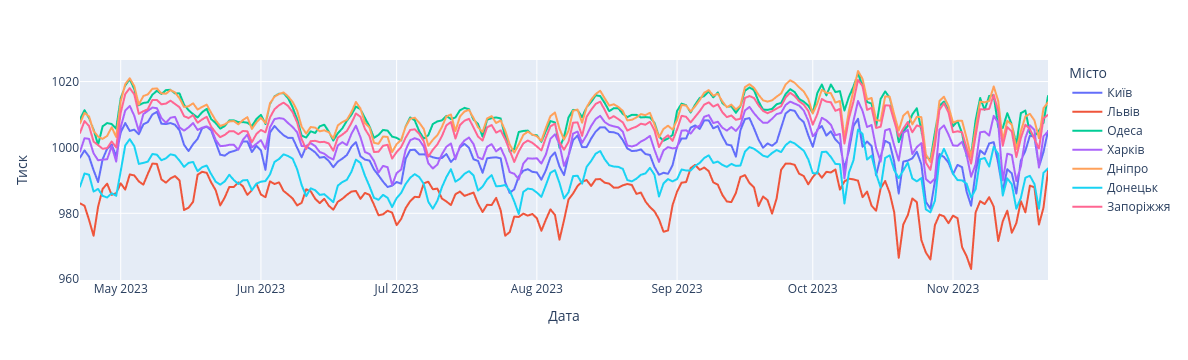

In [15]:
model.print_pressure_plot()

#### Агрегації данних про тиск

##### По датам

In [16]:
model.get_pressure_agg_df("index")

Мін.   Макс.  Розмах  Середнє  Дисперсія  Коеф. варіації
Дата                                                                 
2023-04-22  983.0  1008.5    25.5   998.13      93.72            0.97
2023-04-23  982.3  1011.3    29.0  1000.87     113.50            1.06
2023-04-24  978.0  1009.4    31.4   999.19     128.78            1.14
2023-04-25  973.2  1005.4    32.2   994.76     135.61            1.17
2023-04-26  982.0  1003.3    21.3   994.26      64.90            0.81
...           ...     ...     ...      ...        ...             ...
2023-11-18  988.4  1010.2    21.8  1001.47      67.66            0.82
2023-11-19  987.9  1008.2    20.3   999.93      65.58            0.81
2023-11-20  976.6  1005.1    28.5   993.37     115.32            1.08
2023-11-21  981.7  1011.9    30.2  1000.60     113.41            1.06
2023-11-22  992.9  1015.6    22.7  1005.07      81.41            0.90

[215 rows x 6 columns]

##### По містам

In [17]:
model.get_pressure_agg_df("columns")

Мін.   Макс.  Розмах  Середнє  Дисперсія  Коеф. варіації
Місто                                                               
Дніпро     995.6  1023.2    27.6  1009.95      28.92            0.53
Донецьк    979.8  1005.4    25.6   991.85      25.71            0.51
Запоріжжя  993.2  1020.5    27.3  1006.86      27.44            0.52
Київ       981.4  1011.4    30.0   999.05      34.64            0.59
Львів      963.1   995.1    32.0   984.67      35.98            0.61
Одеса      996.2  1022.5    26.3  1009.74      26.19            0.51
Харків     988.6  1014.1    25.5  1002.41      31.68            0.56

### Кореляційна матриця (лінійна кореляція за Пірсоном)

In [18]:
model.get_correlation_matrix()

Температура      Тиск  Вологість
Місто                                                  
Дніпро    Температура     1.000000 -0.104177  -0.401093
          Тиск           -0.104177  1.000000  -0.323143
          Вологість      -0.401093 -0.323143   1.000000
Донецьк   Температура     1.000000 -0.094154  -0.491415
          Тиск           -0.094154  1.000000  -0.342865
          Вологість      -0.491415 -0.342865   1.000000
Запоріжжя Температура     1.000000 -0.137758  -0.466507
          Тиск           -0.137758  1.000000  -0.219715
          Вологість      -0.466507 -0.219715   1.000000
Київ      Температура     1.000000  0.020660  -0.230835
          Тиск            0.020660  1.000000  -0.368308
          Вологість      -0.230835 -0.368308   1.000000
Львів     Температура     1.000000  0.062692  -0.111331
          Тиск            0.062692  1.000000  -0.130016
          Вологість      -0.111331 -0.130016   1.000000
Одеса     Температура     1.000000 -0.139148  -0.288958
          Тиск           -0.139148  1.000000  -0.407683
          Вологість      -0.288958 -0.407683   1.000000
Харків    Температура     1.000000 -0.019908  -0.242360
          Тиск           -0.019908  1.000000  -0.362208
          Вологість      -0.242360 -0.362208   1.000000

#### Графічне зображення зазначених даних

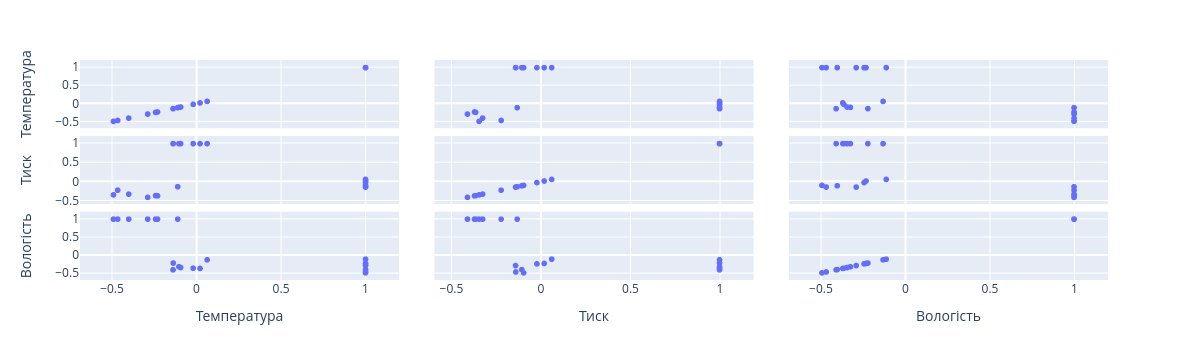

In [19]:
model.print_scatterplot_for_correlation_matrix()